<a href="https://colab.research.google.com/github/AKSHAYKRISHNA012/cl-ai-gradientdescent/blob/main/cl_ai_gradientdescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt


In [2]:
# Input data (x values)
x = torch.linspace(-5, 5, 100).unsqueeze(1)

# True output for the equation: y = 2x³ - 3x² + x - 5
true_y = 2 * x**3 - 3 * x**2 + x - 5


In [3]:
# Random initialization of coefficients with gradients
a = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
c = torch.randn(1, requires_grad=True)
d = torch.randn(1, requires_grad=True)


In [4]:
# Set learning rate and optimizer
lr = 1e-4
optimizer = torch.optim.SGD([a, b, c, d], lr=lr)


In [5]:
# Train the model using Stochastic Gradient Descent
for epoch in range(2000):
    optimizer.zero_grad()

    # Predicted output using current coefficients
    y_pred = a * x**3 + b * x**2 + c * x + d
    y_pred = F.relu(y_pred)  # Apply ReLU activation

    # Calculate loss (MSE between predicted and true output, both with ReLU)
    loss = F.mse_loss(y_pred, F.relu(true_y))

    # Backpropagation and optimization step
    loss.backward()
    optimizer.step()

    if epoch % 200 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


Epoch 0, Loss: 1007.5911
Epoch 200, Loss: 31.4720
Epoch 400, Loss: 25.8837
Epoch 600, Loss: 21.3112
Epoch 800, Loss: 17.5687
Epoch 1000, Loss: 14.5034
Epoch 1200, Loss: 11.9901
Epoch 1400, Loss: 9.9268
Epoch 1600, Loss: 8.2304
Epoch 1800, Loss: 6.8335


In [6]:
# Print the learned values of a, b, c, d
print("\nLearned Coefficients:")
print(f"a = {a.item():.4f}")
print(f"b = {b.item():.4f}")
print(f"c = {c.item():.4f}")
print(f"d = {d.item():.4f}")



Learned Coefficients:
a = 1.6755
b = -1.5470
c = -0.3195
d = -0.4894


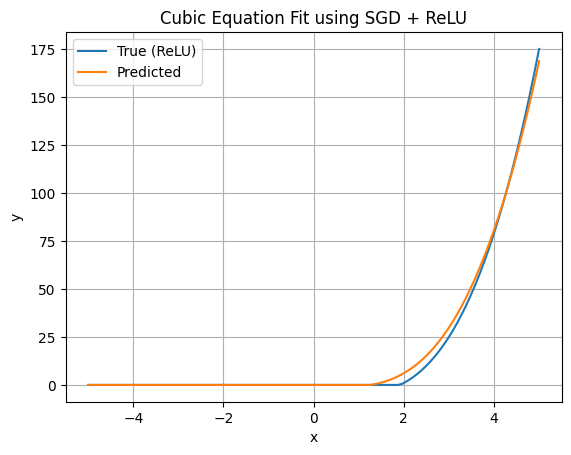

In [7]:
# Plot the actual vs predicted outputs
plt.plot(x.detach(), F.relu(true_y).detach(), label="True (ReLU)")
plt.plot(x.detach(), y_pred.detach(), label="Predicted")
plt.legend()
plt.title("Cubic Equation Fit using SGD + ReLU")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()
